In [1]:
# Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# The path to CSV file
city = "city_data.csv"
ride = "ride_data.csv"

# Read data into pandas
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [3]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
merged_data = pd.merge(ride_df, city_df, how = 'left', on = ['city', 'city'])
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


Bubble Chart Data

In [6]:
# City Type (colors)
Urban = merged_data[merged_data["type"] == "Urban"]
Suburban = merged_data[merged_data["type"] == "Suburban"]
Rural = merged_data[merged_data["type"] == "Rural"]

In [7]:
# Total Number of Rides per City (x_axis)
Urban_rides = Urban.groupby(["city"]).count()["ride_id"]
Suburban_rides = Suburban.groupby(["city"]).count()["ride_id"]
Rural_rides = Rural.groupby(["city"]).count()["ride_id"]

In [8]:
# Average Fare per City (y_axis)
Urban_fares= Urban.groupby(["city"]).mean()["fare"]
Suburban_fares = Suburban.groupby(["city"]).mean()["fare"]
Rural_fares = Rural.groupby(["city"]).mean()["fare"]

In [9]:
# Total Number of Drivers per City (size of bubble)
Urban_drivers = Urban.groupby(["city"]).count()["driver_count"]
Suburban_drivers = Suburban.groupby(["city"]).count()["driver_count"]
Rural_drivers = Rural.groupby(["city"]).count()["driver_count"]

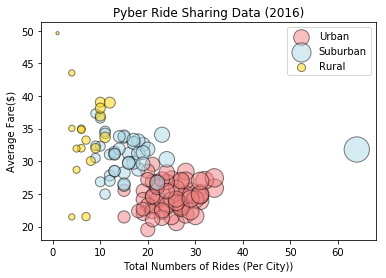

In [10]:
# Bubble chart
plt.scatter(Urban_rides, Urban_fares, s=Urban_drivers*10, marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")
plt.scatter(Suburban_rides, Suburban_fares, s=Suburban_drivers*10, marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.5, label="Suburban")
plt.scatter(Rural_rides, Rural_fares, s=Rural_drivers*10, marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")

# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right', fontsize=10)

Note: Circle size correlates with driver count per city.

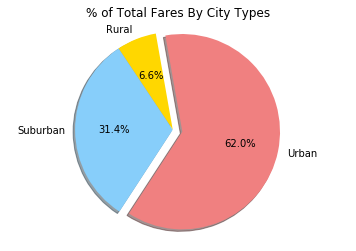

In [11]:
# Total Fare by City Type
total_fare = merged_data.groupby(['type'])['fare'].sum()
# Labels for pie chart
labels = ["Rural","Suburban","Urban" ]
# Colors for the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=100)
plt.axis("equal")
plt.show()

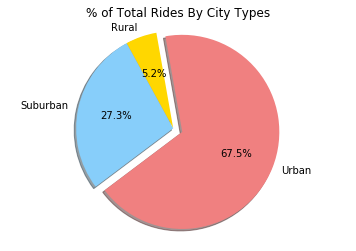

In [12]:
# Total Rides by City Type
total_rides = merged_data.groupby(['type'])['ride_id'].count()
# Labels for pie chart
labels = ["Rural","Suburban","Urban" ]
# Colors for pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.show()

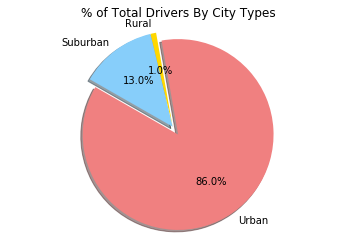

In [13]:
# Total Drivers by City Type
total_drivers = merged_data.groupby(['type'])['driver_count'].sum()
# Labels for pie chart
labels = ["Rural","Suburban","Urban" ]
# Colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.show()

Observations:

1) Rural cities had the lowest "Total Number of Rides", but had the highest "Average fare".

2) The "Average fare" was approximately $5-10 more in the Suburban cities than Rural cities.

3) Urban cities had the highest "% of Tota Fares", "% of Total Rides", and "% of Total Drivers". 